In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df = pd.read_csv("train.csv")


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [89]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [90]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
MoSold,2,5,9,2,12
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal


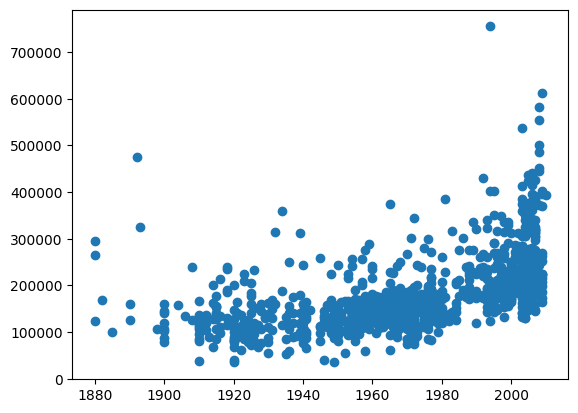

In [91]:
fig, ax = plt.subplots()
ax.scatter(df["YearBuilt"][:1000], df["SalePrice"][:1000])

From the plot, we can observe that houses built in more recent years tend to have higher sale prices. There is a noticeable upward trend, especially from the mid-20th century onwards, indicating that newer houses generally command higher prices in the market. This trend might reflect improvements in construction quality, changes in market demand, or inflation over time.

The scatter plot also reveals a higher variability in sale prices for newer houses, as indicated by the wider spread of points in the later years. This could be due to a variety of factors, such as differences in house sizes, locations, and amenities.

<Axes: ylabel='Frequency'>

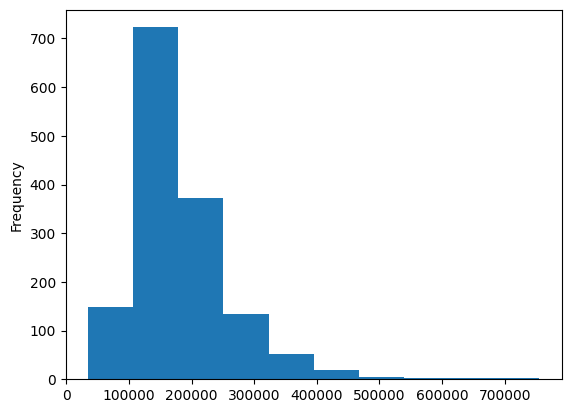

In [92]:
df.SalePrice.plot.hist()

From the histogram, we can observe that the distribution of house prices is right-skewed, with the majority of houses being sold for prices below $200,000. The highest frequency is seen in the price range of approximately $100,000 to $200,000, indicating that most houses fall within this price bracket.

There are fewer houses sold at higher prices, with the frequency decreasing as the sale price increases. The tail on the right side of the histogram shows that there are some houses sold for prices significantly higher than $200,000, but these are less common.

This distribution suggests that the dataset contains more affordable homes, with a few high-value properties. This skewness is important to consider when building regression models, as it may affect the model's performance and predictions.

In [93]:
df.Neighborhood.value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

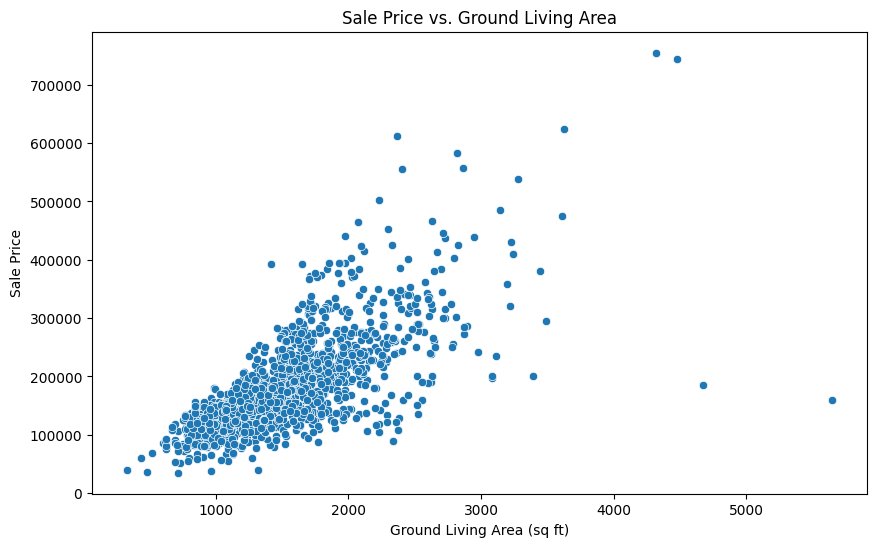

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title('Sale Price vs. Ground Living Area')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

The scatter plot reveals a positive correlation between ground living area and sale price, indicating that larger houses tend to have higher prices. Most houses are within 500 to 3000 square feet and priced below $500,000, with a few outliers representing larger, more expensive properties. The spread in sale prices increases with larger living areas, suggesting more variability in prices for bigger homes. This trend highlights the importance of ground living area as a key feature for predicting house prices.

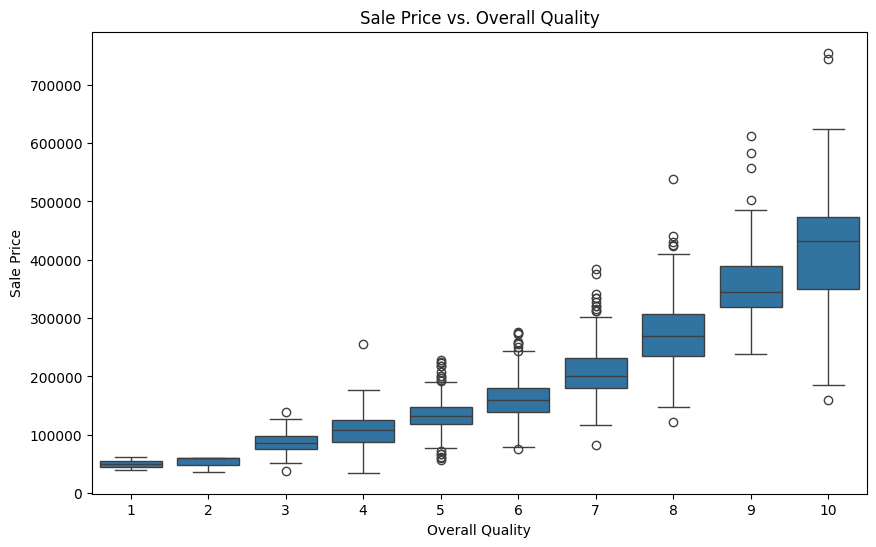

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['OverallQual'], y=df['SalePrice'])
plt.title('Sale Price vs. Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

The box plot shows a strong positive correlation between overall quality and sale price, with higher quality homes having higher median prices. Each increase in quality rating results in a significant rise in sale price. There's more variability in sale prices for higher quality homes, and several outliers indicate exceptionally high-priced properties. The noticeable variability in prices within higher quality ratings suggests that while overall quality is a crucial predictor, other factors also influence house prices.

After thoroughly exploring the dataset, I proceeded with data preprocessing to prepare the data for modeling.

I converted columns containing string data types to categorical data types and set them as ordered categories. This step ensures that the model can appropriately handle categorical variables.

In [3]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
        df[label] = content.astype("category").cat.as_ordered()

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
Heating
HeatingQC
CentralAir
KitchenQual
Functional
PavedDrive
SaleType
SaleCondition


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

In [96]:
df.Neighborhood.cat.categories

Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU',
       'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object')

In [97]:
df.Neighborhood.cat.codes

0        5
1       24
2        5
3        6
4       15
        ..
1455     8
1456    14
1457     6
1458    12
1459     7
Length: 1460, dtype: int8

In [99]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

For numeric columns with missing values, I imputed the missing values using the median of the respective column, as the median is more robust to outliers compared to the mean.

In [4]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            df[label] = content.fillna(content.median())

LotFrontage
MasVnrArea
GarageYrBlt


In [6]:
df.LotFrontage.value_counts()

LotFrontage
69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

For non-numeric columns, I converted the categorical data into numerical codes and reassigned these codes back to the DataFrame. This transformation is essential for enabling the model to process categorical features.

In [5]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)
        df[label] = pd.Categorical(content).codes+1        

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [103]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   Alley          1460 non-null   int8   
 7   LotShape       1460 non-null   int8   
 8   LandContour    1460 non-null   int8   
 9   Utilities      1460 non-null   int8   
 10  LotConfig      1460 non-null   int8   
 11  LandSlope      1460 non-null   int8   
 12  Neighborhood   1460 non-null   int8   
 13  Condition1     1460 non-null   int8   
 14  Condition2     1460 non-null   int8   
 15  BldgType       1460 non-null   int8   
 16  HouseStyle     1460 non-null   int8   
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [105]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,65.0,8450,2,0,4,4,1,...,0,0,0,0,0,2,2008,9,5,208500
1,2,20,4,80.0,9600,2,0,4,4,1,...,0,0,0,0,0,5,2007,9,5,181500
2,3,60,4,68.0,11250,2,0,1,4,1,...,0,0,0,0,0,9,2008,9,5,223500
3,4,70,4,60.0,9550,2,0,1,4,1,...,0,0,0,0,0,2,2006,9,1,140000
4,5,60,4,84.0,14260,2,0,1,4,1,...,0,0,0,0,0,12,2008,9,5,250000


With data preprocessing complete, I moved on to building and evaluating models. I chose the Random Forest Regressor for its suitability in predicting house prices due to its ability to handle high-dimensional data, capture non-linear relationships, and provide robust predictions even in the presence of outliers. By averaging multiple decision trees, Random Forests effectively reduce overfitting, balancing bias and variance.

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
model.fit(df.drop("SalePrice", axis=1), df.SalePrice)

RandomForestRegressor(n_jobs=-1)

In [10]:
model.score(df.drop("SalePrice", axis=1), df.SalePrice)

0.9821020780496429

This metric is not reliable since it could be the sign of over-fitting.

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

models = {"Linear Regression": LinearRegression(), 
          "Random Forest": RandomForestRegressor(n_jobs=-1)}

X= df.drop("SalePrice", axis=1)
y= df.SalePrice

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2, random_state = 42)

def show_score(model):
    model.fit(X_train,y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    print(f"Training RMSE: {np.sqrt(mean_squared_error(y_train, train_preds))}")
    print(f"Valid RMSE: {np.sqrt(mean_squared_error(y_val, val_preds))}")

for name, model in models.items():
    print(name)
    print(show_score(model))



Linear Regression
Training RMSE: 27081.646575097227
Valid RMSE: 37245.66416124379
None
Random Forest
Training RMSE: 10978.93326201803
Valid RMSE: 29284.725050624093
None


I split the dataset into training and validation sets and calculated the Root Mean Squared Error (RMSE) for both sets. The Random Forest Regressor showed significantly lower RMSE compared to Linear Regression, leading to the exclusion of the latter from further consideration.

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1.0, "sqrt"] }
    
rf_model = GridSearchCV(RandomForestRegressor(),
                              param_grid=rf_grid,
                              cv=5,
                              verbose=True,
                              n_jobs=-1)

rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 9720 candidates, totalling 48600 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 10],
                         'max_features': [0.5, 1.0, 'sqrt'],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             verbose=True)

In [19]:
rf_model.best_params_

{'max_depth': 10,
 'max_features': 0.5,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 60}

In [16]:
ideal_rf_model = RandomForestRegressor(
   max_depth= 10,
 max_features= 0.5,
 min_samples_leaf= 3,
 min_samples_split= 4,
 n_estimators= 60
)

ideal_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=0.5, min_samples_leaf=3,
                      min_samples_split=4, n_estimators=60)

In [17]:
show_score(ideal_rf_model)

Training RMSE: 16873.9375426831
Valid RMSE: 28902.680398394423


To optimize the Random Forest model, I performed hyperparameter tuning using GridSearchCV. This process involved an exhaustive search over specified parameter values, ultimately yielding a model with improved validation RMSE.

In [113]:
from sklearn.svm import SVC
param_grid_svm = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 
svm_model = RandomizedSearchCV(SVC(), param_grid_svm, refit=True, verbose=1, cv=5, n_jobs=-1, n_iter=1000)
svm_model.fit(X_train, y_train)
best_params = svm_model.best_params_
print(f"Best params: {best_params}")
ideal_svm = SVC(**best_params)
show_score(ideal_svm)


Fitting 5 folds for each of 126 candidates, totalling 630 fits


c:\Users\tranb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 126 is smaller than n_iter=1000. Running 126 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\tranb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best params: {'kernel': 'rbf', 'gamma': 1, 'C': 0.01}
Training RMSE: 87646.74425861133
Valid RMSE: 95806.35248101116


To ensure the robustness of my approach, I tested Support Vector Machine (SVM) models. Using RandomizedSearchCV with n_iter=1000, I aimed to efficiently explore a wide range of hyperparameter combinations. However, the SVM model performed poorly, and I subsequently excluded it from the final model selection.

After finalizing the Random Forest model, I applied the same preprocessing steps to the test data and made predictions.

In [10]:
df_test = pd.read_csv("test.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
def preprocess_data(df):
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label] = content.fillna(content.median())  
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes+1        
    return df

df_test = preprocess_data(df_test)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,2,0,4,4,1,...,120,0,0,3,0,0,6,2010,9,5
1,1462,20,4,81.0,14267,2,0,1,4,1,...,0,0,0,0,1,12500,6,2010,9,5
2,1463,60,4,74.0,13830,2,0,1,4,1,...,0,0,0,3,0,0,3,2010,9,5
3,1464,60,4,78.0,9978,2,0,1,4,1,...,0,0,0,0,0,0,6,2010,9,5
4,1465,120,4,43.0,5005,2,0,1,2,1,...,144,0,0,0,0,0,1,2010,9,5


In [116]:
df_test.isna().sum()


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [117]:
X_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [131]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [129]:
difference = set(df_test.columns ) - set(X_train.columns)
print(difference)

set()


In [134]:
df_test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,2,0,4,4,1,...,120,0,0,3,0,0,6,2010,9,5
1,1462,20,4,81.0,14267,2,0,1,4,1,...,0,0,0,0,1,12500,6,2010,9,5
2,1463,60,4,74.0,13830,2,0,1,4,1,...,0,0,0,3,0,0,3,2010,9,5
3,1464,60,4,78.0,9978,2,0,1,4,1,...,0,0,0,0,0,0,6,2010,9,5
4,1465,120,4,43.0,5005,2,0,1,2,1,...,144,0,0,0,0,0,1,2010,9,5


In [12]:
df_test = df_test[X_train.columns]

In [18]:
test_preds = ideal_rf_model.predict(df_test)
test_preds

array([128225.92261822, 152611.68589833, 182577.59314864, ...,
       159926.10536936, 119253.60281553, 222384.84401435])

In [20]:
df_preds = pd.DataFrame()
df_preds["Id"] = df_test["Id"]
df_preds["SalePrice"] = test_preds
df_preds

,Id,SalePrice
0,1461,128225.922618
1,1462,152611.685898
2,1463,182577.593149
3,1464,186447.201586
4,1465,203337.851650
...,...,...
1454,2915,88204.812923
1455,2916,90962.749329
1456,2917,159926.105369
1457,2918,119253.602816


In [21]:
df_preds.to_csv("predictions.csv",index=False)

In [22]:
ideal_rf_model.feature_importances_

array([4.14907755e-03, 1.68049118e-03, 2.30639047e-03, 5.90032220e-03,
       1.93670672e-02, 0.00000000e+00, 2.39564441e-04, 1.19103095e-03,
       6.22944055e-04, 0.00000000e+00, 9.83782563e-04, 1.11496781e-03,
       7.65285428e-03, 2.50589909e-04, 3.46341238e-04, 8.36754189e-04,
       8.12274164e-04, 3.25514987e-01, 3.54480296e-03, 4.13631620e-02,
       9.72031856e-03, 5.39089007e-04, 0.00000000e+00, 8.45097399e-04,
       1.00918968e-03, 7.58988799e-04, 8.03271261e-03, 4.54490899e-02,
       1.97010007e-04, 3.94135329e-04, 1.40178672e-02, 7.62450561e-04,
       1.70080108e-03, 1.32769114e-03, 2.85801160e-02, 6.62060648e-05,
       1.76624978e-04, 5.80707244e-03, 4.04676093e-02, 8.70854715e-05,
       8.64434769e-04, 2.84728771e-03, 5.39043854e-05, 3.05783071e-02,
       2.21983776e-02, 1.80413903e-06, 1.57276121e-01, 1.52425864e-03,
       7.50883098e-06, 1.33421599e-02, 9.35687286e-04, 3.89769512e-03,
       1.18674460e-03, 1.32569752e-02, 5.03142287e-03, 2.56739555e-04,
      

In [23]:
import seaborn as sns

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

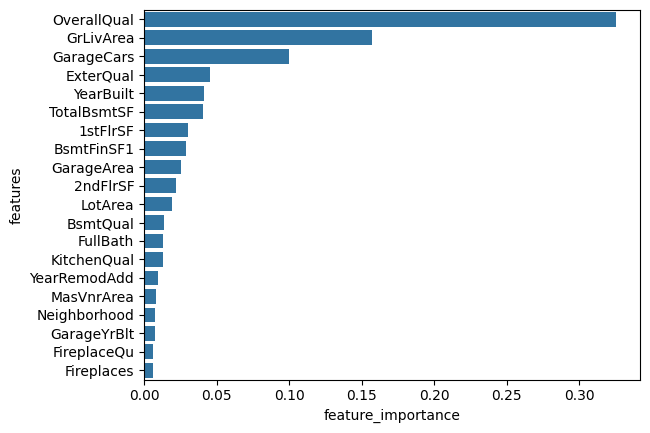

In [24]:
plot_features(X_train.columns, ideal_rf_model.feature_importances_)

I extracted and visualized feature importances from the Random Forest model to understand which features most significantly influenced house price predictions. This analysis provided valuable insights into the factors driving house prices and aided in interpreting the model’s decisions.